## Missing Values

In [182]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [183]:
df=pd.read_csv('titanic.csv')

In [184]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Dữ liệu trống hoàn toàn ngẫu nhiên

In [186]:
# cac hanh khach ko co du lieu ve dia diem len tau
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


* Dữ liệu trống không ngẫu nhiên => Có mối quan hệ với các dữ liệu khác

In [187]:
# Hành khách không có dữ liệu về chỗ ngồi = 1, ngược lại bằng 0
df['Cabin_null'] = np.where(df['Cabin'].isnull(), 1, 0)
df['Cabin_null']
# Tìm phần trăm hành khách không có dữ liệu về chỗ ngồi
df['Cabin_null'].mean()
# Tìm phần trăm hành khách không có dữ liệu về chỗ ngồi, phần trăm theo tình trạng sống chết
df.groupby(['Survived'])['Cabin_null'].mean()


Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

=> Những người không sống sót bị trống dữ liệu về chỗ ngồi nhiều hơn người sống sót

## Các kỹ thuật xử lý dữ liệu trống

- Giá trị trung bình/trung vị/giá trị xuất hiện nhiều nhất (Mean/
Median/Mode imputation)
- Giá trị được lấy ngẫu nhiên từ dữ liệu (Random sample imputation)
- Giá trị tại đuôi của phân bố dữ liệu (End of distribution imputation)
- Giá trị bất kỳ (Arbitrary Value Imputation)
- Tạo đặc trưng mới (Create a new feature) đánh dấu các quan sát chứa
dữ liệu trống


In [188]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived', 'Sex'])
df.head()

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500


In [189]:
# Phan tram du lieu trong cua moi cot
df.isnull().mean()

Survived    0.000000
Sex         0.000000
Age         0.198653
Fare        0.000000
dtype: float64

=> Cột 'Age' có 19% dữ liệu vị trống, còn 2 cột 'Survived' và 'Fare' thì không bị trống dữ liệu

In [190]:
def probability_density_function(old_data, new_data):
    # ve ham mat do xac suat cua cot Age truoc va sau khi dien du lieu trong
    fig = plt.figure()
    ax = fig.add_subplot(111)
    old_data.plot(kind='kde', color='blue')
    new_data.plot(kind='kde', color='red')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

In [191]:
def get_std_before_and_after(method, before, after):    
# in ra do lech chuan truoc va sau khi dien du lieu trong
    print('***' + method + '***')
    print(before.std())
    print(after.std())

### 7 kỹ thuật xử lý dữ liệu trống

***Mean***
14.526497332334044
13.002015226002884
***Median***
14.526497332334044
13.019696550973194
***Mode***
14.526497332334044
13.199571767746487
***Random value***
14.526497332334044
14.5636540895687
***End of dist***
14.526497332334044
21.719150677136366
***Fix value***
14.526497332334044
13.00257003982093


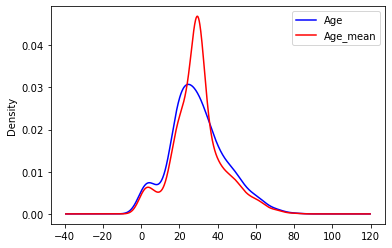

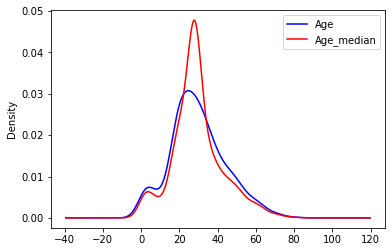

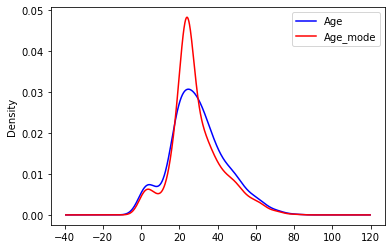

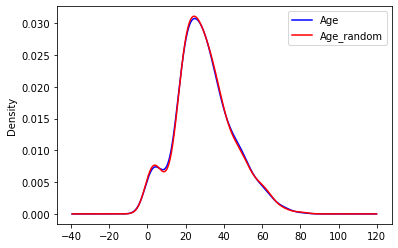

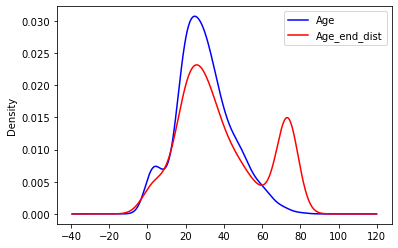

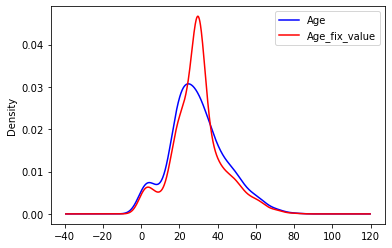

In [192]:
# Mean 
mean = df['Age'].mean()
df['Age_mean'] = df['Age'].fillna(mean)
get_std_before_and_after('Mean', df['Age'], df['Age_mean'])
probability_density_function(df['Age'], df['Age_mean'])

# Median
median = df['Age'].median()
df['Age_median'] = df['Age'].fillna(median)
get_std_before_and_after('Median', df['Age'], df['Age_median'])
probability_density_function(df['Age'], df['Age_median'])

# Mode 
mode = df['Age'].mode().values[0]
df['Age_mode'] = df['Age'].fillna(mode)
get_std_before_and_after('Mode', df['Age'], df['Age_mode'])
probability_density_function(df['Age'], df['Age_mode'])

# Random value
## Lấy ngẫu nhiên từ cột Age n giá trị khác NaN, kết quả sẽ lặp lại sau mỗi lần thực hiện lệnh
random_samples = df['Age'].dropna().sample(n = df['Age'].isnull().sum(), random_state = 0)
## Chỉ số của khách hàng bị trống trong dữ liệu Age
random_samples.index = df['Age'][df['Age'].isnull()].index
## Thay thế dữ liệu trống bằng các giá trị ngẫu nhiên của cột
df['Age_random'] = df['Age']
## Lấy ra những vị trí Age = Nah của cột Age_random và gán với những giá trị ngẫu nhiên tìm được
df.loc[df['Age'].isnull(), 'Age_random']=random_samples
get_std_before_and_after('Random value', df['Age'], df['Age_random'])
probability_density_function(df['Age'], df['Age_random'])

# End of distribution 
## Gia tri o duoi cua phan bo (bien Age theo phan bo chuan)
age_end = df['Age'].mean() + 3 * df['Age'].std()
df['Age_end_dist'] = df['Age'].fillna(age_end)
get_std_before_and_after('End of dist', df['Age'], df['Age_end_dist'])
probability_density_function(df['Age'], df['Age_end_dist'])


# Fix Value
df['Age_fix_value'] = df['Age'].fillna(30) 
get_std_before_and_after('Fix value',df['Age'], df['Age_fix_value'])
probability_density_function(df['Age'], df['Age_fix_value']) 

# New feature
## Thay thế dữ liệu trống bằng 1 trong các kỹ thuật đã trình bày đồng thời tạo thêm biến để đánh dấu quan sát có dữ liệu trống
df['Age_NAN'] = np.where(df['Age'].isnull(), 1, 0)

<AxesSubplot:>

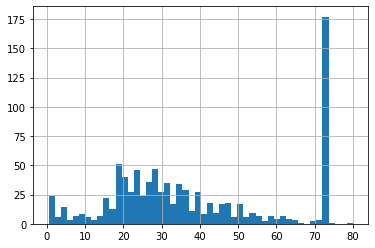

In [193]:
# Histogram của biến Age sau khi thay Nah bằng End_of_dist
df['Age_end_dist'].hist(bins=50)

<AxesSubplot:>

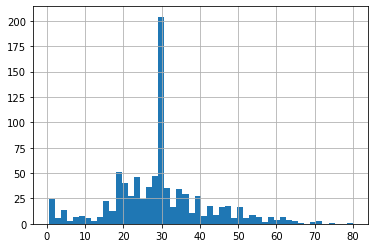

In [194]:
# Histogram của biến Age sau khi thay Nah bằng Median
df['Age_mean'].hist(bins=50)

## Xử lý dữ liệu ngoại lệ (Outliers)

<AxesSubplot:>

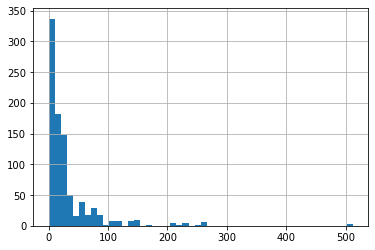

In [195]:
df['Fare'].describe()
df['Fare'].hist(bins=50)

<AxesSubplot:>

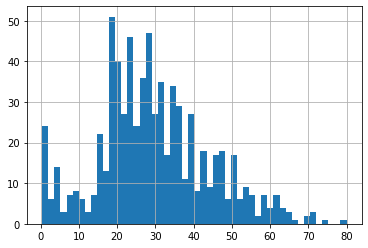

In [196]:
df['Age'].describe()
df['Age'].hist(bins=50)

### Dữ liệu cột 'Fare' có dạng phân bố lệch (skewed) nên ta có: 
* ==> + Biên trên = 3rd Quantile + 3*IQR
* ==> + Biên dưới =  1st Quantile - 3*IQR

* IQR: Interquantile range
    * 3rd Quantile = Percentile 75
    * 1st Quantile = Percentile 25

In [197]:
IQR = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)
print(IQR)  

23.0896


In [198]:
upper_boundary = df['Fare'].quantile(0.75) + 3 * IQR
lower_boundary = df['Fare'].quantile(0.25) - 3 * IQR
print(upper_boundary)
print(lower_boundary)

100.2688
-61.358399999999996


### Cột Age phân bố chuẩn nên sử dụng công thức tìm cận trên cận dưới như sau:
- Biên trên = GTTB + 3*Độ lệch chuẩn 
- Biên dưới = GTTB - 3*Độ lệch chuẩn

In [199]:
uppper_boundary = df['Age_mean'].mean() + 3 * df['Age_mean'].std()
lower_boundary = df['Age_mean'].mean() - 3 * df['Age_mean'].std()
print(lower_boundary), print(uppper_boundary), print(df['Age_mean'].mean())

-9.30692803094989
68.70516332506742
29.699117647058763


(None, None, None)

In [200]:
data = df.copy()
data_non_pr = df.copy()

In [201]:
# Xác định các giá trị biên trên và biên dưới của dữ liệu
# Thay thế giá trị ngoại lệ bằng 1 trong 2 giá trị trên
data.loc[data['Age'] >= 68, 'Age'] = 68
data.loc[data['Fare'] >= 100, 'Fare'] = 100

Text(0, 0.5, 'Nber of passengers')

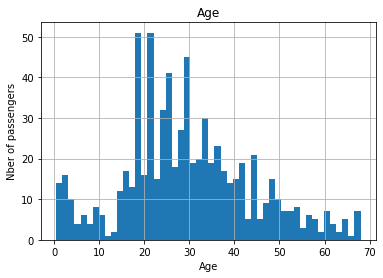

In [202]:
# Phân bố tuổi sau khi thay thế các giá trị > biên trên bằng 68
figure = data['Age'].hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Nber of passengers')

Text(0, 0.5, 'Nber of passengers')

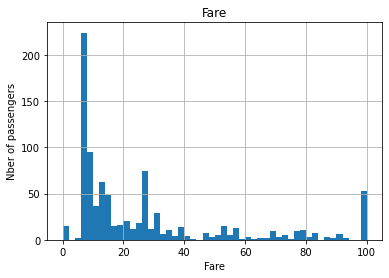

In [203]:
# Phân bố giá vé sau khi gán các giá trị > biên trên với 100
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('Nber of passengers')

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
handle_accuracy = []
non_handle_accuracy = []
for random_state in range(10):
    # Training data
    x1_train, x1_test, y1_train, y1_test = train_test_split(
        data[['Age_mean', 'Fare']], data['Survived'], test_size=0.3, random_state = random_state)
    x2_train, x2_test, y2_train, y2_test = train_test_split(
        data_non_pr[['Age_mean', 'Fare']], data_non_pr['Survived'], test_size=0.3, random_state = random_state)
    # Fit the model according to the given training data.
    classifier.fit(x1_train, y1_train)
    # Predicting
    y1_predict = classifier.predict(x1_test)
    classifier.fit(x2_train, y2_train)
    y2_predict = classifier.predict(x2_test)
    handle_accuracy.append(accuracy_score(y1_test, y1_predict))
    non_handle_accuracy.append(accuracy_score(y2_test, y2_predict))

In [205]:
print(handle_accuracy)
print(non_handle_accuracy)

[0.6977611940298507, 0.6231343283582089, 0.6865671641791045, 0.6231343283582089, 0.667910447761194, 0.6940298507462687, 0.7126865671641791, 0.6604477611940298, 0.667910447761194, 0.6380597014925373]
[0.6865671641791045, 0.6194029850746269, 0.6567164179104478, 0.6417910447761194, 0.6753731343283582, 0.6455223880597015, 0.6865671641791045, 0.6305970149253731, 0.6567164179104478, 0.6305970149253731]


In [206]:
print("Accuracy (Handle exception): {}".format(sum(handle_accuracy)/len(handle_accuracy)))
print("Accuracy (Non handle exception): {}".format(sum(non_handle_accuracy)/len(non_handle_accuracy)))

Accuracy (Handle exception): 0.6671641791044777
Accuracy (Non handle exception): 0.6529850746268656


## Chuẩn hóa dữ liệu
* Data Standardization
1. Chuẩn hoá theo z-score
2. Chuẩn hoá Min-Max
3. Chuẩn hoá mạnh với ngoại lệ (robust to outliers)
4. Các kỹ thuật biến đổi dữ liệu khác

In [207]:
# Thêm đặc trưng sex để cải thiện độ chính xác
data['Sex'] = np.where(data['Sex']=='female', 0, 1)
data_non_pr['Sex'] =  np.where(data_non_pr['Sex']=='female', 0, 1)

In [208]:
# Chuẩn hóa Min-Max
from sklearn.preprocessing import MinMaxScaler
# Chuẩn hóa theo z-score
from sklearn.preprocessing import StandardScaler
# Chuẩn hóa mạnh với ngoại lệ
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=40)
scaler = MinMaxScaler()

In [209]:
scaled_handle_ex = []
scaled_non_handle_ex = []
for random_state in range(10):
    x1_train, x1_test, y1_train, y1_test = train_test_split(
        data[['Age_mean', 'Fare', 'Sex']], data['Survived'], test_size=0.3, random_state = random_state)

    x2_train, x2_test, y2_train, y2_test = train_test_split(
        data_non_pr[['Age_mean', 'Fare', 'Sex']], data_non_pr['Survived'], test_size=0.3, random_state = random_state)
    
    # chuẩn hóa trước khi fit model
    x1_train = scaler.fit_transform(x1_train)
    x1_test = scaler.fit_transform(x1_test)

    x2_train = scaler.fit_transform(x2_train)
    x2_test = scaler.fit_transform(x2_test)
    
    classifier.fit(x1_train, y1_train)
    y1_predict = classifier.predict(x1_test)

    classifier.fit(x2_train, y2_train)
    y2_predict = classifier.predict(x2_test)

    scaled_handle_ex.append(accuracy_score(y1_test, y1_predict))
    scaled_non_handle_ex.append(accuracy_score(y2_test, y2_predict))


In [210]:
print("Accuracy (Handle exception) After Normalize: {}".format(sum(scaled_handle_ex)/len(scaled_handle_ex)))
print("Accuracy (Non handle exception) After Normalize: {}".format(sum(scaled_non_handle_ex)/len(scaled_non_handle_ex)))

Accuracy (Handle exception) After Normalize: 0.7593283582089552
Accuracy (Non handle exception) After Normalize: 0.7440298507462686


=> Cải thiện được 0.02 khi sử dụng phương pháp chuẩn hóa min-max

### SCIKIT-LEARN

In [213]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
X = [[ 1, 2, 3], # 2 samples, 3 features
[11, 12, 13]]
y = [0, 1] # class labels of each sample
clf.fit(X, y) # model fiGng

RandomForestClassifier(random_state=0)

In [214]:
clf.predict(X) # predict classe labels of the training data
clf.predict([[4, 5, 6], [14, 15, 16]]) # predict classe labels of the new data

array([0, 1])

In [215]:
from sklearn.preprocessing import StandardScaler
X = [[0, 15],
[1, -10]]
# scale data according to computed scaling values
StandardScaler().fit_transform(X)

array([[-1.,  1.],
       [ 1., -1.]])

In [216]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
X, y = make_regression(n_samples=1000, random_state=0)
lr = LinearRegression()
result = cross_validate(lr, X, y) # defaults to 5-fold CV
result['test_score'] # r_squared score is high because dataset is easy

array([1., 1., 1., 1., 1.])

In [217]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# define the parameter space that will be searched over
param_distributions = {'n_estimators': randint(1, 5),
'max_depth': randint(5, 10)}
# now create a searchCV object and fit it to the data
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
param_distributions=param_distributions,
n_iter=5,
random_state=0)
search.fit(X_train, y_train)
search.best_params_ # Parameter setting that gave the best results on the hold out data
# the search object now acts like a normal random forest estimator
# with max_depth=9 and n_estimators=4
search.score(X_test, y_test)

0.735363411343253

In [218]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
# create a pipeline object
pipe = make_pipeline(
StandardScaler(),
LogisticRegression()
)
# load the iris dataset and split it into train and test sets
X = data[['Age_mean', 'Fare']]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
# fit the whole pipeline
pipe.fit(X_train, y_train)
# we can now use it like any other estimator
accuracy_score(y_test, pipe.predict(X_test))

0.680672268907563

In [219]:
# X.shape, y.shape
# X_train.shape, y_train.shape
X_test.shape, y_test.shape

((357, 2), (357,))

In [220]:

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)
scores = cross_val_score(clf, X, y, cv=10)
scores

array([0.61111111, 0.58426966, 0.68539326, 0.74157303, 0.6741573 ,
       0.68539326, 0.69662921, 0.71910112, 0.69662921, 0.66292135])

### Đánh giá mô hình

#### Cross validation: The following procedure is followed for each of the k “folds”:
A model is trained using k - 1 of the folds as training data;

The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy)

#### K fold cross validation is used for the situation like: test and train is not similar

In [229]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold

X = data[['Age_mean', 'Fare', 'Sex']]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, =test_size0.15, 
                                                    shuffle=True, stratify=y)


cv = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)

kfold_acc = 0.
for train_idx, valid_idx in cv.split(X_train, y_train):
    clf = DecisionTreeClassifier(random_state=123, max_depth=3).fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    y_pred = clf.predict(X_train.iloc[valid_idx])
    acc = np.mean(y_pred == y_train.iloc[valid_idx])*100
    kfold_acc += acc
kfold_acc /= 10
    
clf = DecisionTreeClassifier(random_state=123, max_depth=3).fit(X_train, y_train)
y_pred = clf.predict(X_test)
test_acc = np.mean(y_pred == y_test)*100
    
print('Kfold Accuracy: %.2f%%' % kfold_acc)
print('Test Accuracy: %.2f%%' % test_acc)

Kfold Accuracy: 78.61%
Test Accuracy: 78.36%
